In [135]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt

import importlib
import functional_hierarchical_tensor_sketch
importlib.reload(functional_hierarchical_tensor_sketch)
from functional_hierarchical_tensor_sketch import hier_tensor_sketch

import scienceplots
plt.style.use('science')

figsize = (3.5,2.0)
fontsize = 8

# 1D

[0.50138601 0.50051018 0.53804165 0.9317515  0.9968244  0.99923474
 0.999525  ]
[0.49996512 0.49725241 0.50595343 0.49027916 0.50486092 0.50912581
 0.50026307]


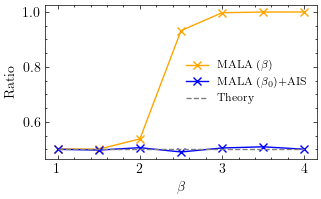

In [136]:
# d = 256, β from 1, λ = h/10, scale = 12, LAST MALA = 700

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T = 7
β0 = 1

β_list = [1,3/2,2,5/2,3,7/2,4]

file = f'1D_GZ_{d}_lambda_0.1h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}.npz'):
        with np.load(data_path+f'_β_{β}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta)$',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))

plt.plot(β_list,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x')

plt.plot(β_list,0.5*np.ones(len(β_list)),linestyle='--',color='grey',label='Theory')
plt.xlabel(r'$\beta$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_β.pdf',bbox_inches='tight')

plt.show()

[0.99966465 0.99952505 0.99946684 0.99940166 0.99933128 0.99925092
 0.99916352 0.99907014 0.99896711 0.9988562  0.99873384 0.99859791
 0.99845476 0.99829639 0.99813271 0.99794943 0.99775432 0.99754187
 0.997318   0.99708156 0.9968244 ]
[0.99966465 0.64230286 0.50837065 0.49937715 0.50239777 0.49820887
 0.49903012 0.49996512 0.49698924 0.4960527  0.49699771 0.50358737
 0.50486092]
[9, 11, 13, 15, 17]


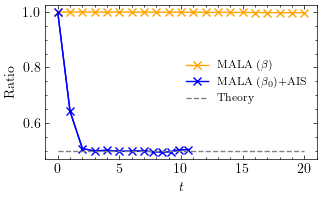

In [137]:
# d = 256, β 1 to 3, λ = h/10, scale = 12, LAST MALA = 700

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T1 = 20
T2 = 7
β0 = 1
β = 3
L = 10
y = 700/2000 + 1/12/L

file = f'1D_GZ_{d}_lambda_0.1h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T1+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(range(0,T1+1),data0,label=r'MALA $(\beta)$',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}"  # This is the path from the previous code

with np.load(data_path+f'_T_{T2}.npz') as data:
    dat0 = data[f'samples']

x = [i for i in range(T2+1)] + [T2 + i * y for i in range(2,L+1,2)]
tmp = [np.float64(0.49947078983016224), np.float64(0.496989243561843), np.float64(0.4974086058038535), np.float64(0.4960526977047695), np.float64(0.5000942739527425), np.float64(0.49699771243929836), np.float64(0.49786143756457046), np.float64(0.5035873652057172), np.float64(0.501872534271417), np.float64(0.5048609234993908)]
data0 += tmp[1::2]

print(np.array(data0))

plt.plot(x,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x',markevery=x[:T2+1])

plt.plot(x,data0,color='blue',marker='x',markevery=[T2 + i + 1 for i in range(L//2)],markerfacecolor = 'none')

print([T2 + i for i in range(2,L+1,2)])

plt.plot(range(0,T1+1),0.5*np.ones(T1+1),linestyle='--',color='grey',label='Theory')
plt.xlabel(r'$t$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_T.pdf',bbox_inches='tight')

plt.show()

In [138]:
# Load problem parameter
d = 256
L = 8
deg = 15

T = 7
β0 = 1
β = 3

file = f'1D_GZ_{d}_lambda_0.1h_700_PBC'

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}_T_{T}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y = all_samples / 2.5    
y = y[:6000, :]

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β}_T_{T}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y_2 = all_samples / 2.5    
y_2 = y_2[:6000, :]

r = dict()
s = dict()
r_level = 3 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 3 + 0*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]



# Hierarchical Tensor Sketching
c, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y, L, d, deg, r = r, s = s, debug = True)
np.savez(f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz", c=c, A_dict = A_dict, B_dict = B_dict)
htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])

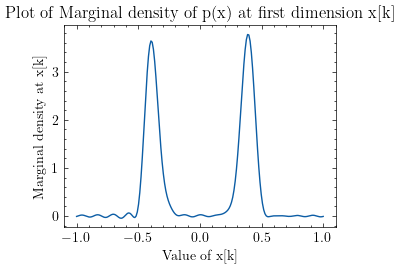

In [141]:
k = 8

x = np.zeros([200, d])
x[:, k] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, k], htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != k]))
plt.xlabel('Value of x[k]')
plt.ylabel('Marginal density at x[k]')
plt.title('Plot of Marginal density of p(x) at first dimension x[k]')
plt.show()

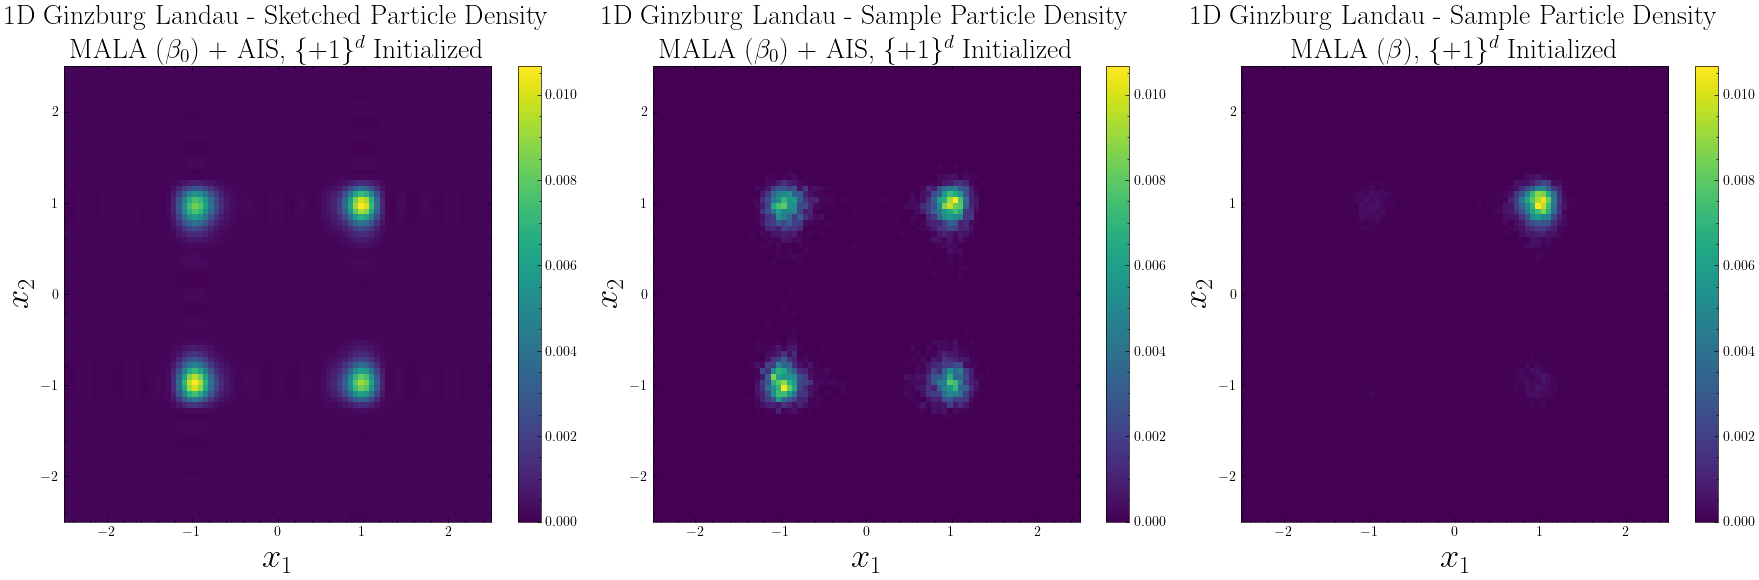

In [142]:
# Hierarchical Tensor Sketching
core_data_path = f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz"
with np.load(core_data_path, allow_pickle=True) as data:
#     print(data.files)
#     print(data['c'])
    c = data['c'].item()

htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])




# Parameters for columns
# col1, col2 = 59, 15
col1, col2 = 1, 2

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)


# Pre-allocate the heatmap matrix
heatmap_1D = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap_1D[i, j] = evaluated_marginal[i*n_grid + j]

heatmap_1D /= heatmap_1D.sum()
# Extract the particle positions
particles = y[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D /= hist_1D.sum()  # Normalize

# Extract the particle positions
particles = y_2[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D_2, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D_2 /= hist_1D_2.sum()  # Normalize


plt.rcParams['text.usetex'] = True

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

label_size = 25
title_size = 20

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_title("1D Ginzburg Landau - Sketched Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[0].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[0].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[1].imshow(hist_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[1].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[1].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im3 = axes[2].imshow(hist_1D_2, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta$), $\{+1\}^d$ Initialized", fontsize = title_size)
axes[2].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[2].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

plt.tight_layout()

cbar = fig.colorbar(im2, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')

cbar3 = fig.colorbar(im2, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.savefig(f"{file}_AIS.pdf", format="pdf")
# plt.savefig(f"{file}.pdf", format="pdf", dpi=300)

plt.show()

[0.4979728  0.50152781 0.89172798 0.99753382 0.99931819 0.99948705]
[0.49630183 0.49298052 0.50375006 0.49824859 0.50722325 0.50403472]


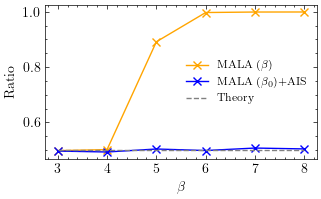

In [143]:
# d = 256, β from 3, λ = 0.5h, scale = 60, LAST MALA = 600

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T = 7
β0 = 3

β_list = [3,4,5,6,7,8]

file = f'1D_GZ_{d}_lambda_0.5h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}.npz'):
        with np.load(data_path+f'_β_{β}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta)$',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))

plt.plot(β_list,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x')

plt.plot(β_list,0.5*np.ones(len(β_list)),linestyle='--',color='grey',label='Theory')
plt.xlabel(r'$\beta$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_β.pdf',bbox_inches='tight')

plt.show()

[0.99966465 0.99934647 0.99929431 0.9992373  0.99917312 0.99911107
 0.99904613 0.99897217 0.99889793 0.99881626 0.99872881 0.99863963
 0.99854222 0.99843562 0.99832368 0.99821998 0.99811284 0.99797087
 0.99782922 0.99768233 0.99753382]
[0.99966465 0.79048988 0.56388251 0.51889798 0.50570606 0.50765965
 0.50114004 0.49630183 0.49444807 0.49445332 0.49375986 0.49456301
 0.49824859]


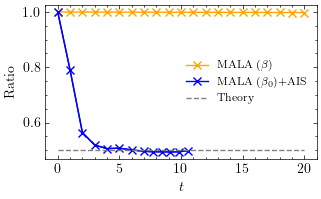

In [144]:
# d = 256, β 3 to 6, λ = 0.5h, scale = 60, LAST MALA = 600

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T1 = 20
T2 = 7
β0 = 3
β = 6
L = 10
y = 700/2000 + 3/60/L

file = f'1D_GZ_{d}_lambda_0.5h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T1+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(range(0,T1+1),data0,label=r'MALA $(\beta)$',color='orange',marker='x')
# plt.scatter(T,data1[-1],label=r'MALA $(\beta_0)$+AIS',color='blue',marker='o',facecolors='none')

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}"  # This is the path from the previous code

with np.load(data_path+f'_T_{T2}.npz') as data:
    dat0 = data[f'samples']

x = [i for i in range(T2+1)] + [T2 + i * y for i in range(2,L+1,2)]
tmp = [np.float64(0.497987885658575), np.float64(0.4944480668176225), np.float64(0.5021655230799493), np.float64(0.4944533182389181), np.float64(0.49193768684457073), np.float64(0.49375986152139356), np.float64(0.4991889316295318), np.float64(0.49456301198711283), np.float64(0.5032474804604373), np.float64(0.49824859206866673)]
data0 += tmp[1::2]

print(np.array(data0))

plt.plot(x,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x',markevery=x[:T2+1])

plt.plot(x,data0,color='blue',marker='x',markevery=[T2 + i + 1 for i in range(L//2)],markerfacecolor = 'none')


plt.plot(range(0,T1+1),0.5*np.ones(T1+1),linestyle='--',color='grey',label='Theory')
plt.xlabel(r'$t$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_T.pdf',bbox_inches='tight')

plt.show()

In [169]:
# Load problem parameter
d = 256
L = 8
deg = 15

T1 = 20
T2 = 7
β0 = 3
β = 6

file = f'1D_GZ_{d}_lambda_0.5h_700_PBC'

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}_T_{T2}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y = all_samples / 2.5    
y = y[:6000, :]

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/1D_GZ_data_d_{d}_MALA_β_{β}_T_{T1}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y_2 = all_samples / 2.5    
y_2 = y_2[:6000, :]

r = dict()
s = dict()
r_level = 6 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 6 + 0*np.arange(L,0, -1)
# s_level[0] += 5

# r_level = 4 + 2*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
# s_level = 5 + 2*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]



# Hierarchical Tensor Sketching
c, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y, L, d, deg, r = r, s = s, debug = True)
np.savez(f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz", c=c, A_dict = A_dict, B_dict = B_dict)
htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])

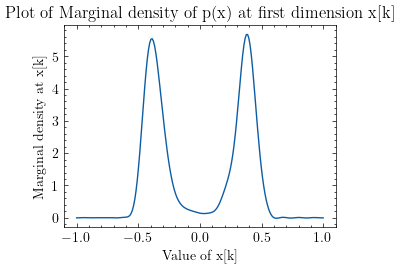

In [172]:
k = 100

x = np.zeros([200, d])
x[:, k] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, k], htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != k]))
plt.xlabel('Value of x[k]')
plt.ylabel('Marginal density at x[k]')
plt.title('Plot of Marginal density of p(x) at first dimension x[k]')
plt.show()

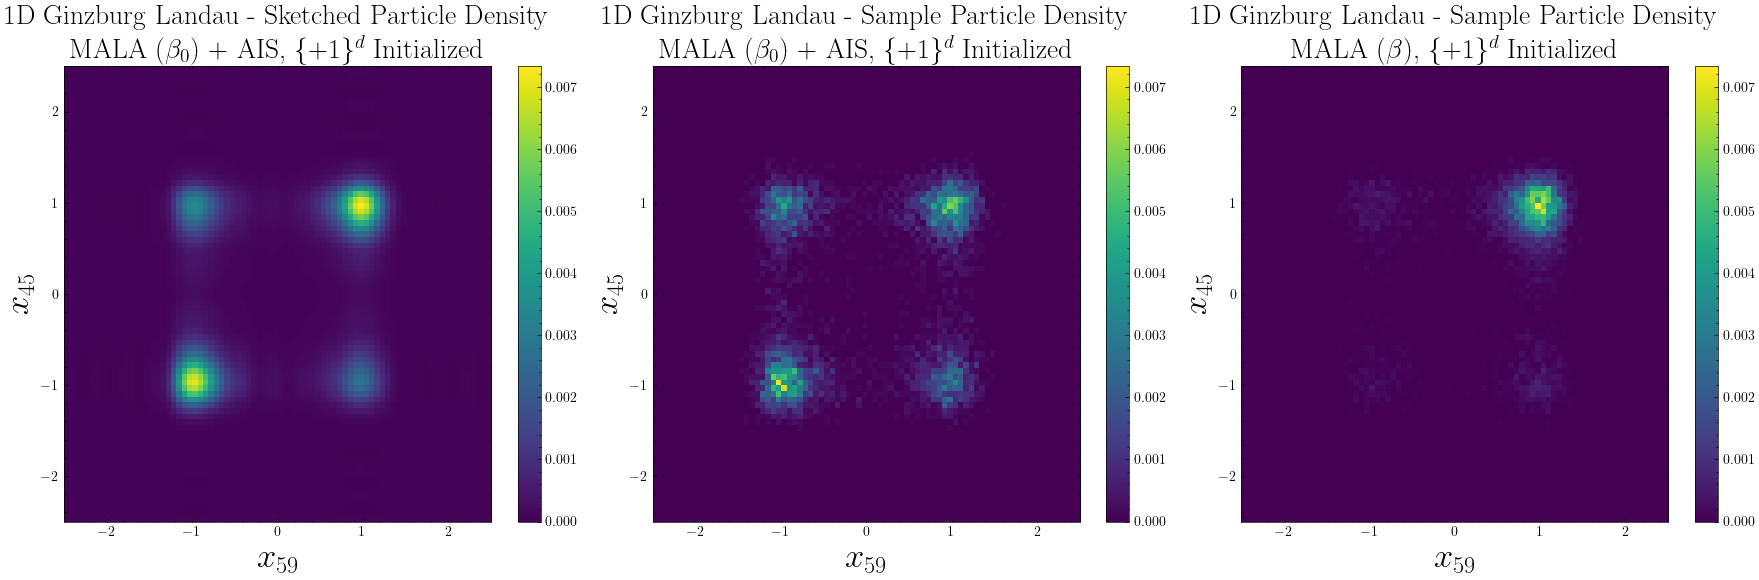

In [176]:
# Hierarchical Tensor Sketching
core_data_path = f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz"
with np.load(core_data_path, allow_pickle=True) as data:
#     print(data.files)
#     print(data['c'])
    c = data['c'].item()

htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])




# Parameters for columns
col1, col2 = 59, 45

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)


# Pre-allocate the heatmap matrix
heatmap_1D = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap_1D[i, j] = evaluated_marginal[i*n_grid + j]

heatmap_1D /= heatmap_1D.sum()
# Extract the particle positions
particles = y[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D /= hist_1D.sum()  # Normalize

# Extract the particle positions
particles = y_2[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D_2, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D_2 /= hist_1D_2.sum()  # Normalize


plt.rcParams['text.usetex'] = True

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

label_size = 25
title_size = 20

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_title("1D Ginzburg Landau - Sketched Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[0].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[0].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[1].imshow(hist_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[1].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[1].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im3 = axes[2].imshow(hist_1D_2, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta$), $\{+1\}^d$ Initialized", fontsize = title_size)
axes[2].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[2].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

plt.tight_layout()

cbar = fig.colorbar(im2, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')

cbar3 = fig.colorbar(im2, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.savefig(f"{file}_AIS.pdf", format="pdf")
# plt.savefig(f"{file}.pdf", format="pdf", dpi=300)

plt.show()

[0.38334188 0.22314251 0.48875366 0.99339784 0.99912134 0.99944902]
[0.38239896 0.23556708 0.12011796 0.07098388 0.055174   0.04873778]
[0.37774857 0.23609037 0.12578491 0.07010591 0.05197805 0.04971917]


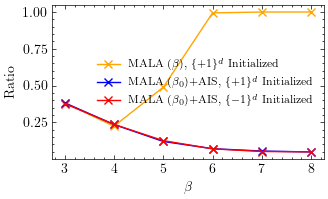

In [177]:
# d = 256, β from 3, λ = h/2, scale = 60, LAST MALA = 600

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T = 7
β0 = 3
h = 1 / d
λ = 0.5 * h
a = 0.01
L = 10

def E_V(U):
    return np.mean(V(U))

β_list = [3,4,5,6,7,8]

file = f'1D_GZ_Asym_{d}_lambda_0.5h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_MALA"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}.npz'):
        with np.load(data_path+f'_β_{β}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))
        
print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta)$, $\{+1\}^d$ Initialized',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta_0)$+AIS, $\{+1\}^d$ Initialized',color='blue',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{-a}/1D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(1 - np.array(data0))

plt.plot(β_list,1 - np.array(data0),label=r'MALA $(\beta_0)$+AIS, $\{-1\}^d$ Initialized',color='red',marker='x')

# size = fig.get_size_inches()
# print(size)

plt.xlabel(r'$\beta$')
plt.ylabel(r'Ratio')
plt.legend(fontsize=8)
plt.savefig(f'{file}_Evolution_β.pdf',bbox_inches='tight')

plt.show()

[0.99966465 0.99931342 0.99923377 0.99914417 0.99905073 0.99892956
 0.99880106 0.99865826 0.99848722 0.99828841 0.99807628 0.99783361
 0.99755886 0.99722081 0.99684777 0.99640145 0.99590903 0.99538582
 0.99474976 0.99412464 0.99339784]
[0.99966465 0.7221932  0.44244589 0.39258383 0.38481372 0.38311639
 0.37813307 0.38239896 0.36823876 0.34206503 0.31230636 0.27436657
 0.24090954 0.2053614  0.16057434 0.12733572 0.09395092 0.07098388]
[3.35350130e-04 1.56334309e-01 3.28825489e-01 3.69049225e-01
 3.80476174e-01 3.80187534e-01 3.76852529e-01 3.77748571e-01
 3.59442097e-01 3.38257300e-01 3.09427226e-01 2.76007641e-01
 2.41915302e-01 2.04399878e-01 1.62858982e-01 1.27225783e-01
 9.25526534e-02 7.01059102e-02]


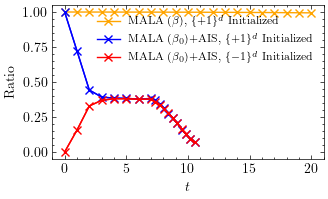

In [178]:
# d = 256, β 3 to 6, λ = h/2, scale = 60, LAST MALA = 600

def transit(y):
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T1 = 20
T2 = 7
β0 = 3
β = 6
h = 1 / d
λ = 0.5 * h
a = 0.01
L = 10
y = 700/2000 + 3/60/L

def padding(U):
    if np.size(U.shape) == 1:
        U = U[np.newaxis,:]
    return U

file = f'1D_GZ_Asym_{d}_lambda_0.5h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_MALA_β_{β}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T1+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(range(0,T1+1),data0,label=r'MALA $(\beta)$, $\{+1\}^d$ Initialized',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}"  # This is the path from the previous code

with np.load(data_path+f'_T_{T2}.npz') as data:
    dat0 = data[f'samples']

x = [i for i in range(T2+1)] + [T2 + i * y for i in range(1,L+1)]
tmp = [np.float64(0.3682387648113426), np.float64(0.3420650336074449), np.float64(0.3123063579824207), np.float64(0.274366573701001), np.float64(0.24090953977716786), np.float64(0.20536140350812704), np.float64(0.16057433839186427), np.float64(0.12733572398618906), np.float64(0.09395091757946722), np.float64(0.070983877074924)]
    # np.float64(0.3614092346793676), np.float64(0.3352365529765687), np.float64(0.3055390560000384), np.float64(0.27020509099076623), np.float64(0.2399597842489582), np.float64(0.20244773301980631), np.float64(0.169190436262632), np.float64(0.1302902916650611), np.float64(0.1018871279868003), np.float64(0.077304746913134)]
data0 += tmp

print(np.array(data0))
print('=======================')

plt.plot(x,data0,label=r'MALA $(\beta_0)$+AIS, $\{+1\}^d$ Initialized',color='blue',marker='x',markevery=x[:T2+1])
plt.plot(x,data0,color='blue',marker='x',markevery=[T2 + i for i in range(1,L+1)],markerfacecolor = 'none')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{-a}/1D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))
tmp = [np.float64(0.6405579028740535), np.float64(0.6617427000274048), np.float64(0.6905727737139681), np.float64(0.7239923594547553), np.float64(0.7580846984159678), np.float64(0.7956001224519739), np.float64(0.8371410182568579), np.float64(0.87277421670064), np.float64(0.9074473465669615), np.float64(0.9298940898210937)]
data0 += tmp

print(1 - np.array(data0))

plt.plot(x,1 - np.array(data0),label=r'MALA $(\beta_0)$+AIS, $\{-1\}^d$ Initialized',color='red',marker='x',markevery=x[:T2+1])
plt.plot(x,1 - np.array(data0),color='red',marker='x',markevery=[T2 + i for i in range(1,L+1)],markerfacecolor = 'none')

plt.xlabel(r'$t$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_T.pdf',bbox_inches='tight')

plt.show()

In [179]:
# Load problem parameter
d = 256
L = 8
deg = 15

T1 = 20
T2 = 7
β0 = 3
β = 6
a = 0.01

file = f'1D_GZ_Asym_{d}_lambda_0.5h_700_PBC'

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_β0_{β0}_β_{β}_T_{T2}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y = all_samples / 2.5    
y = y[:6000, :]

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/1D_GZ_data_d_{d}_MALA_β_{β}_T_{T1}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data[f'samples']
else:
    raise ValueError(f"No data found at path {data_path}")

# Normalize range to [-1, 1]
y_2 = all_samples / 2.5    
y_2 = y_2[:6000, :]

r = dict()
s = dict()
r_level = 6 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 6 + 0*np.arange(L,0, -1)
# s_level[0] += 5

# r_level = 4 + 2*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
# s_level = 5 + 2*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]



# Hierarchical Tensor Sketching
c, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y, L, d, deg, r = r, s = s, debug = True)
np.savez(f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz", c=c, A_dict = A_dict, B_dict = B_dict)
htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])

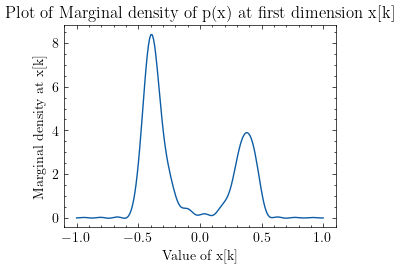

In [180]:
k = 100

x = np.zeros([200, d])
x[:, k] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, k], htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != k]))
plt.xlabel('Value of x[k]')
plt.ylabel('Marginal density at x[k]')
plt.title('Plot of Marginal density of p(x) at first dimension x[k]')
plt.show()

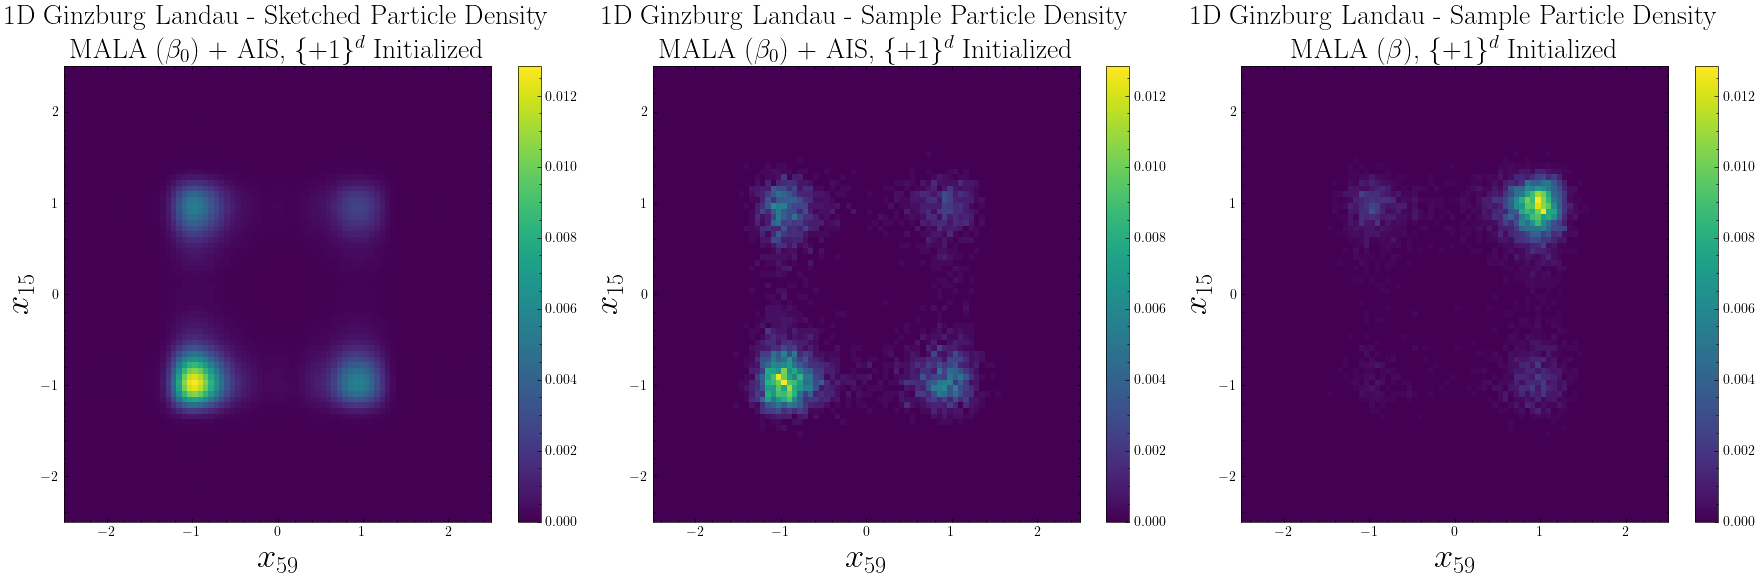

In [181]:
# Hierarchical Tensor Sketching
core_data_path = f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz"
with np.load(core_data_path, allow_pickle=True) as data:
#     print(data.files)
#     print(data['c'])
    c = data['c'].item()

htn_obtained = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c, deg = deg, ghost_pt = [])




# Parameters for columns
# col1, col2 = 150, 130
col1, col2 = 59, 15

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)


# Pre-allocate the heatmap matrix
heatmap_1D = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap_1D[i, j] = evaluated_marginal[i*n_grid + j]

heatmap_1D /= heatmap_1D.sum()
# Extract the particle positions
particles = y[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D /= hist_1D.sum()  # Normalize

particles = y_2[:, [col1, col2]]

# Create a 2D histogram for particles
hist_1D_2, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_1D_2 /= hist_1D_2.sum()  # Normalize


plt.rcParams['text.usetex'] = True

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

label_size = 25
title_size = 20

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_title("1D Ginzburg Landau - Sketched Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[0].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[0].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[1].imshow(hist_1D, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[1].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[1].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

# Heatmap for particles
im3 = axes[2].imshow(hist_1D_2, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title("1D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta$), $\{+1\}^d$ Initialized", fontsize = title_size)
axes[2].set_xlabel(f"$x_{{{col1}}}$", fontsize = label_size)
axes[2].set_ylabel(f"$x_{{{col2}}}$", fontsize = label_size)

plt.tight_layout()

cbar = fig.colorbar(im3, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im3, ax=axes[1], orientation='vertical')

cbar3 = fig.colorbar(im3, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.savefig(f"{file}_AIS.pdf", format="pdf")
# plt.savefig("1D_GZ.pdf", format="pdf", dpi=300)

plt.show()

# 2D

[0.50270557 0.51679395 0.86569354 0.99332042 0.99858845 0.99922115]
[0.50337109 0.49436254 0.50578219 0.49971133 0.51535309 0.4873195 ]


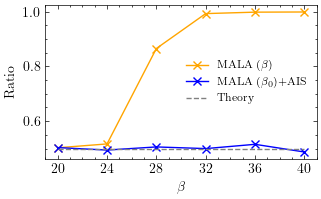

In [234]:
# d = 256, β from 20, λ = 0.125h, scale = 150, LAST MALA = 700

def transit(y):
    dim0 = y.shape[0]
    y = y.reshape(dim0,-1)
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T = 12
β0 = 20

β_list = [20,24,28,32,36,40]

file = f'2D_GZ_{d}_lambda_0.125h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_MALA"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}.npz'):
        with np.load(data_path+f'_β_{β}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta)$',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))

plt.plot(β_list,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x')

plt.plot(β_list,0.5*np.ones(len(β_list)),linestyle='--',color='grey',label='Theory')
plt.xticks(β_list)
plt.xlabel(r'$\beta$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_β.pdf',bbox_inches='tight')

plt.show()

[0.99966465 0.9989437  0.99853626 0.99818103 0.99787083 0.99756922
 0.99727423 0.99702675 0.99676911 0.99644705 0.99616299 0.99587339
 0.99557145 0.99529873 0.99501937 0.99475236 0.99444429 0.99417502
 0.99388203 0.99363632 0.99332042]
[0.99966465 0.96837812 0.85321304 0.71683103 0.61997981 0.56565508
 0.53126581 0.51866185 0.50956525 0.50542553 0.49883098 0.50277551
 0.50337109 0.49730394 0.50084093 0.49676318 0.49817224 0.49971133]


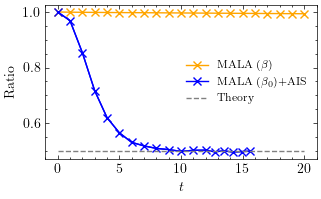

In [235]:
# d = 256, β 20 to 32, λ = 0.125h, scale = 150, LAST MALA = 700

def transit(y):
    dim0 = y.shape[0]
    y = y.reshape(dim0,-1)
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T1 = 20
T2 = 12
β0 = 20
β = 32
L = 10
y = 700/2000 + 20/150/L

file = f'2D_GZ_{d}_lambda_0.125h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_MALA_β_{β}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T1+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(range(0,T1+1),data0,label=r'MALA $(\beta)$',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_β0_{β0}_β_{β}"  # This is the path from the previous code

with np.load(data_path+f'_T_{T2}.npz') as data:
    dat0 = data[f'samples']

x = [i for i in range(T2+1)] + [T2 + i * y for i in range(2,L+1,2)]
tmp = [np.float64(0.4986976925136227), np.float64(0.49730394161104835), np.float64(0.4980459607913547), np.float64(0.5008409280555207), np.float64(0.49473706103310805), np.float64(0.4967631797087017), np.float64(0.4987370657442037), np.float64(0.4981722355314044), np.float64(0.5031019201606697), np.float64(0.49971132854812855)]
data0 += tmp[1::2]

print(np.array(data0))

plt.plot(x,data0,label=r'MALA $(\beta_0)$+AIS',color='blue',marker='x',markevery=x[:T2+1])

plt.plot(x,data0,color='blue',marker='x',markevery=[T2 + i + 1 for i in range(L//2)],markerfacecolor = 'none')


plt.plot(range(0,T1+1),0.5*np.ones(T1+1),linestyle='--',color='grey',label='Theory')
plt.xlabel(r'$t$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_T.pdf',bbox_inches='tight')

plt.show()


In [184]:
import random
from itertools import islice

def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def transform_3d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n))
    
    for i in range(n):
        for j in range(n):
            col_idx = interlace(i, j, l)
            transformed_data[:, col_idx] = data[:, i, j]
    
    return transformed_data


def nbhd_int_fun_2d(node, L):
    k, l = node
    k_bin = int_to_bin(k - 1, l)
    node_1 = k_bin + (L-l)*'0'
    node_2 = k_bin + (L-l)*'1'
    i_min, j_min = revert_interlace_2d(int(node_1, 2), int(L/2))
    i_max, j_max = revert_interlace_2d(int(node_2, 2), int(L/2))

    i_candidate = [i_min, i_max]
    j_candidate = [j_min, j_max]

    nbhd_int = []

    for i in i_candidate:
        j_list = list(islice(list(range(j_min, j_max + 1)), min(1, j_max - j_min + 1)))
        j_list += list(islice(reversed(list(range(j_min, j_max + 1))), min(1, j_max - j_min + 1)))
        j_list = list(set(j_list))
        for j in j_list:
            nbhd_int.append(interlace(i, j, int(L/2)) + 1)

    for j in j_candidate:
        i_list = list(islice(list(range(i_min, i_max + 1)), min(1, i_max - i_min + 1)))
        i_list += list(islice(reversed(list(range(i_min, i_max + 1))), min(1, i_max - i_min + 1)))
        i_list = list(set(i_list))

        for i in i_list:
            nbhd_int.append(interlace(i, j, int(L/2)) + 1)
    nbhd_int = sorted(list(set(nbhd_int)))
    return list(set(nbhd_int))

def nbhd_fun_2d(node, L):
    k, l = node
    k_bin = int_to_bin(k - 1, l)
    node_1 = k_bin + (L-l)*'0'
    node_2 = k_bin + (L-l)*'1'
    i_min, j_min = revert_interlace_2d(int(node_1, 2), int(L/2))
    i_max, j_max = revert_interlace_2d(int(node_2, 2), int(L/2))
    
    if i_min == 0 and i_max == 2 ** (int(L/2)) - 1:
        i_candidate = []
    elif i_min == 0:
        i_candidate = [i_max + 1]
    elif i_max == 2 ** (int(L/2)) - 1:
        i_candidate = [i_min - 1]
    else:
        i_candidate = [i_max + 1, i_min - 1]
    
    if j_min == 0 and j_max == 2 ** (int(L/2)) - 1:
        j_candidate = []
    elif j_min == 0:
        j_candidate = [j_max + 1]
    elif j_max == 2 ** (int(L/2)) - 1:
        j_candidate = [j_min - 1]
    else:
        j_candidate = [j_max + 1, j_min - 1]
    
    nbhd = []
    
    for i in i_candidate:
        j_list = list(islice(list(range(j_min, j_max + 1)), min(1, j_max + 1 - j_min)))
        j_list += list(islice(reversed(list(range(j_min, j_max + 1))), min(1, j_max + 1 - j_min)))
        j_list += [(j_max + j_min) // 2]

        for j in j_list:
            nbhd.append(interlace(i, j, int(L/2)) + 1)
    
    for j in j_candidate:
        i_list = list(islice(list(range(i_min, i_max + 1)), min(1, i_max + 1 - i_min)))
        i_list = list(islice(reversed(list(range(i_min, i_max + 1))), min(1, i_max + 1 - i_min)))
        i_list += [(i_max + i_min) // 2]

        for i in i_list:
            nbhd.append(interlace(i, j, int(L/2)) + 1)
    return list(set(nbhd))


def revert_interlace_2d(k, l):
    # Convert the interlaced number back to binary.
    k_bin = int_to_bin(k, 2 * l)  # The length is doubled because it contains both i and j.
    
    # Separate the bits that belong to i and j.
    i_bits = k_bin[::2]  # Take every other bit, starting from the first
    j_bits = k_bin[1::2]  # Take every other bit, starting from the second

    # Convert these bits back to integers.
    i = int(i_bits, 2)
    j = int(j_bits, 2)

    return i, j


In [223]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt


def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def interlace(i, j, l):
    """Interlace the binary representations of i and j up to length l."""
    i_bin = int_to_bin(i, l)
    j_bin = int_to_bin(j, l)
    interlaced = ''.join([a + b for a, b in zip(i_bin, j_bin)])
    return int(interlaced, 2)

def transform_3d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n))
    
    for i in range(n):
        for j in range(n):
            col_idx = interlace(i, j, l)
            transformed_data[:, col_idx] = data[:, i, j]
    
    return transformed_data


# Load problem parameter
d = 256
L = 8
deg = 15

T1 = 20
T2 = 12
β0 = 20
β = 32

file = f'2D_GZ_{d}_lambda_0.125h_700_PBC'

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_β0_{β0}_β_{β}_T_{T2}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples']
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_2d = transform_3d_to_2d(filtered_samples)


# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/2D_GZ_data_d_{d}_MALA_β_{β}_T_{T1}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples']
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_2d_2 = transform_3d_to_2d(filtered_samples)

    
r = dict()
s = dict()
r_level = 6 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 6 + 0*np.arange(L,0, -1)
# s_level[0] += 5

# r_level = 4 + 2*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
# s_level = 5 + 2*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]

# Normalize range to [-1, 1]
y_2d = data_2d / 2.5
y_2d = y_2d[:6000, :]

y_2d_2 = data_2d_2 / 2.5
y_2d_2 = y_2d_2[:6000, :]


# Hierarchical Tensor Sketching
c_2d, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y_2d, L, d, deg, r = r, s = s, debug = True, nbhd_fun=nbhd_fun_2d, nbhd_int_fun=nbhd_int_fun_2d)

np.savez(f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz", c=c_2d, A_dict = A_dict, B_dict = B_dict)

htn_obtained_2d = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c_2d, deg = deg, ghost_pt = [])

Original number of batches: 6000
Number of batches after filtering: 6000
Original number of batches: 6000
Number of batches after filtering: 6000


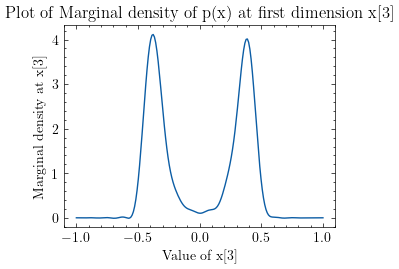

In [224]:
k = 3

x = np.zeros([200, d])
x[:, k] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, k], htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != k]))
# plt.ylim([-100, np.max(tt_obtained.evaluate_marginal(x, mask = [1,2]))])
plt.xlabel(f'Value of x[{k}]')
plt.ylabel(f'Marginal density at x[{k}]')
plt.title(f'Plot of Marginal density of p(x) at first dimension x[{k}]')
plt.show()


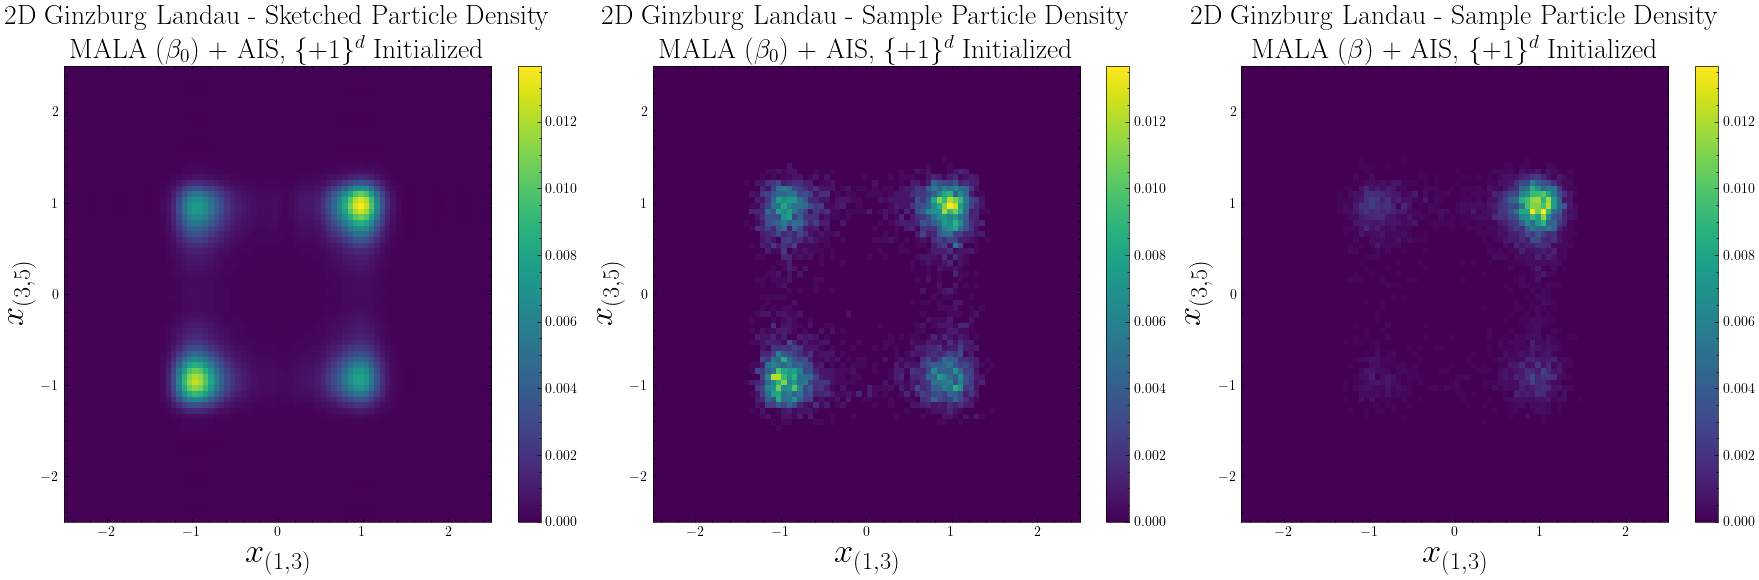

In [230]:
import numpy as np
import matplotlib.pyplot as plt

d = 256

# Parameters for columns
particle_1 = (1, 3)
# particle_2 = (6, 8)
particle_2 = (3, 5)
col1, col2 = interlace(particle_1[0], particle_1[1], 4), interlace(particle_2[0], particle_2[1], 4)

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap[j, i] = evaluated_marginal[j*n_grid + i]
heatmap /= heatmap.sum()

# Extract the particle positions
particles = y_2d[:, [col1, col2]]

# Create a 2D histogram for particles
hist, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist /= hist.sum()  # Normalize

# Extract the particle positions
particles = y_2d_2[:, [col1, col2]]

# Create a 2D histogram for particles
hist_2, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_2 /= hist_2.sum()  # Normalize


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

label_size = 25
title_size = 20

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_title("2D Ginzburg Landau - Sketched Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[0].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[0].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[1].imshow(hist, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title("2D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[1].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[1].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[2].imshow(hist_2, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title("2D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[2].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[2].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

plt.tight_layout()

cbar = fig.colorbar(im2, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')

cbar3 = fig.colorbar(im2, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.savefig(f"{file}_AIS.pdf", format="pdf")
# plt.savefig("2D_GZ.pdf", format="pdf", dpi=300)

plt.show()

[0.34855817 0.23304205 0.45323681 0.97834126 0.99790107 0.999079  ]
[0.35127311 0.23252761 0.11651966 0.05552299 0.02918712 0.0208687 ]
[0.35091097 0.23575872 0.114366   0.05163615 0.02708731 0.01889291]


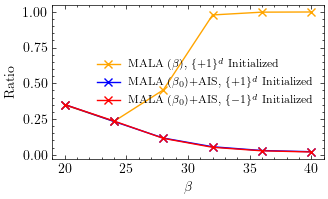

In [236]:
# d = 256, β from 20, λ = h/8, scale = 150, LAST MALA = 700

def transit(y):
    dim0 = y.shape[0]
    y = y.reshape(dim0,-1)
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T = 12
β0 = 20
h = 1 / d
λ = h / 8
a = 0.01
L = 10

def E_V(U):
    return np.mean(V(U))

β_list = [20,24,28,32,36,40]

file = f'2D_GZ_Asym_{d}_lambda_0.125h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_MALA"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}.npz'):
        with np.load(data_path+f'_β_{β}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))
        
print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta)$, $\{+1\}^d$ Initialized',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(β_list,data0,label=r'MALA $(\beta_0)$+AIS, $\{+1\}^d$ Initialized',color='blue',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{-a}/2D_GZ_data_d_{d}_β0_{β0}"  # This is the path from the previous code

data0 = []
for β in β_list:
    if os.path.exists(data_path+f'_β_{β}_T_{T}.npz'):
        with np.load(data_path+f'_β_{β}_T_{T}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(1 - np.array(data0))

plt.plot(β_list,1 - np.array(data0),label=r'MALA $(\beta_0)$+AIS, $\{-1\}^d$ Initialized',color='red',marker='x')

# size = fig.get_size_inches()
# print(size)

plt.xlabel(r'$\beta$')
plt.ylabel(r'Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_β.pdf',bbox_inches='tight')

plt.show()

[0.99966465 0.99885175 0.99832887 0.99782124 0.99729825 0.9967615
 0.99618365 0.99557104 0.99489841 0.99414246 0.99336581 0.99244814
 0.99145605 0.99037281 0.98918592 0.98788241 0.98638526 0.98486767
 0.98303353 0.98085801 0.97834126]
[0.99966465 0.96116423 0.80127297 0.60589008 0.48243806 0.42152783
 0.38981715 0.3692598  0.36105226 0.35262449 0.35370901 0.35304374
 0.35127311 0.33577833 0.31731535 0.29389555 0.26241935 0.2248359
 0.18964296 0.149688   0.11534371 0.08118912 0.05552299]
[3.35350130e-04 2.53292947e-02 1.02210364e-01 1.94550808e-01
 2.59830001e-01 2.99098548e-01 3.22476063e-01 3.36145223e-01
 3.44042035e-01 3.46785051e-01 3.49143135e-01 3.54896184e-01
 3.50910972e-01 3.35234708e-01 3.15642255e-01 2.86575588e-01
 2.56323532e-01 2.22775959e-01 1.85782477e-01 1.49618656e-01
 1.09954967e-01 7.67013432e-02 5.16361457e-02]


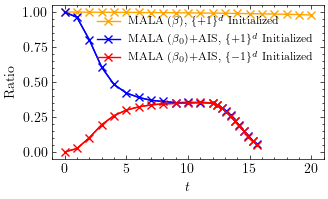

In [237]:
# d = 256, β 20 to 32, λ = h/8, scale = 150, LAST MALA = 700

def transit(y):
    dim0 = y.shape[0]
    y = y.reshape(dim0,-1)
    g1 = np.mean( np.exp(-2/d * np.sum((y-1)**2,axis=1) ))
    g2 = np.mean( np.exp(-2/d * np.sum((y+1)**2,axis=1) ))
    return(g1/(g1+g2))

d = 256 
T1 = 20
T2 = 12
β0 = 20
β = 32
h = 1 / d
λ = h / 8
a = 0.01
L = 10
y = 700/2000 + 20/150/L

def padding(U):
    if np.size(U.shape) == 1:
        U = U[np.newaxis,:]
    return U

file = f'2D_GZ_Asym_{d}_lambda_0.125h_700_PBC'

fig = plt.figure(figsize=figsize)

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_MALA_β_{β}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T1+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

print(np.array(data0))
print('=======================')

plt.plot(range(0,T1+1),data0,label=r'MALA $(\beta)$, $\{+1\}^d$ Initialized',color='orange',marker='x')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))

data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_β0_{β0}_β_{β}"  # This is the path from the previous code

with np.load(data_path+f'_T_{T2}.npz') as data:
    dat0 = data[f'samples']

x = [i for i in range(T2+1)] + [T2 + i * y for i in range(1,L+1)]
tmp = [np.float64(0.3357783280228999), np.float64(0.31731535244447884), np.float64(0.29389554586967687), np.float64(0.26241935094813496), np.float64(0.22483590225933292), np.float64(0.18964295626138727), np.float64(0.14968799505207778), np.float64(0.11534371212385174), np.float64(0.0811891239901229), np.float64(0.055522994125209335)]
data0 += tmp

print(np.array(data0))
print('=======================')

plt.plot(x,data0,label=r'MALA $(\beta_0)$+AIS, $\{+1\}^d$ Initialized',color='blue',marker='x',markevery=x[:T2+1])
plt.plot(x,data0,color='blue',marker='x',markevery=[T2 + i for i in range(1,L+1)],markerfacecolor = 'none')

data_path = f"./Data_deposit_script/Saved_Data/{file}/{-a}/2D_GZ_data_d_{d}_MALA_β_{β0}"  # This is the path from the previous code

data0 = [transit(np.ones((1,d)))]
for T_count in range(1,T2+1):
    if os.path.exists(data_path+f'_T_{T_count}.npz'):
        with np.load(data_path+f'_T_{T_count}.npz') as data:
            dat0 = data[f'samples']
        data0.append(transit(dat0))
tmp = [np.float64(0.664765292312886), np.float64(0.6843577451478209), np.float64(0.7134244116375562), np.float64(0.7436764677564355), np.float64(0.7772240405800959), np.float64(0.8142175233643104), np.float64(0.8503813437356689), np.float64(0.8900450330712283), np.float64(0.9232986567516056), np.float64(0.9483638542695713)]
data0 += tmp

print(1 - np.array(data0))

plt.plot(x,1 - np.array(data0),label=r'MALA $(\beta_0)$+AIS, $\{-1\}^d$ Initialized',color='red',marker='x',markevery=x[:T2+1])
plt.plot(x,1 - np.array(data0),color='red',marker='x',markevery=[T2 + i for i in range(1,L+1)],markerfacecolor = 'none')

plt.xlabel(r'$t$')
plt.ylabel('Ratio')
plt.legend(fontsize=fontsize)
plt.savefig(f'{file}_Evolution_T.pdf',bbox_inches='tight')

plt.show()

In [241]:
import numpy as np
import os
from functional_hierarchical_tensor_fourier import FunctionalHierarchicalTensorFourier
from functional_hierarchical_tensor_sketch import hier_tensor_sketch
import matplotlib.pyplot as plt


def int_to_bin(val, length):
    """Convert integer to binary representation with fixed length."""
    return format(val, f'0{length}b')

def interlace(i, j, l):
    """Interlace the binary representations of i and j up to length l."""
    i_bin = int_to_bin(i, l)
    j_bin = int_to_bin(j, l)
    interlaced = ''.join([a + b for a, b in zip(i_bin, j_bin)])
    return int(interlaced, 2)

def transform_3d_to_2d(data):
    """Transform 3D data of shape (N, n, n) to 2D data of shape (N, n*n) using interlacing."""
    N, n, _ = data.shape
    l = int(np.log2(n))
    
    transformed_data = np.zeros((N, n*n))
    
    for i in range(n):
        for j in range(n):
            col_idx = interlace(i, j, l)
            transformed_data[:, col_idx] = data[:, i, j]
    
    return transformed_data


# Load problem parameter
d = 256
L = 8
deg = 15

T1 = 20
T2 = 12
β0 = 20
β = 32
a = 0.01

file = f'2D_GZ_Asym_{d}_lambda_0.125h_700_PBC'

# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_β0_{β0}_β_{β}_T_{T2}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples']
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_2d = transform_3d_to_2d(filtered_samples)


# Load data
data_path = f"./Data_deposit_script/Saved_Data/{file}/{a}/2D_GZ_data_d_{d}_MALA_β_{β}_T_{T1}.npz"  # This is the path from the previous code

if os.path.exists(data_path):
    with np.load(data_path) as data:
        all_samples = data['samples']
else:
    raise ValueError(f"No data found at path {data_path}")


# Find batches containing NaN values
invalid_batches = np.any(np.isnan(all_samples), axis=(1,2))

# Filter out those batches
filtered_samples = all_samples[~invalid_batches]

print(f"Original number of batches: {all_samples.shape[0]}")
print(f"Number of batches after filtering: {filtered_samples.shape[0]}")

data_2d_2 = transform_3d_to_2d(filtered_samples)

    
r = dict()
s = dict()
r_level = 6 + 0*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
s_level = 6 + 0*np.arange(L,0, -1)
# s_level[0] += 5

# r_level = 4 + 2*np.arange(L,0, -1)
# r_level[0] = 10
# r_level[1] = 10
# s_level = 5 + 2*np.arange(L,0, -1)
# s_level[0] += 5


for l in reversed(range(0, L + 1)):
    for k in range(1, 2 ** l + 1):
        if l == L:
            r[(k, l)] = [2*deg + 1, r_level[L - 1]]
            s[(k, l)] = [2*deg + 1, r_level[L - 1] + s_level[L-1]]
        elif l == 0:
            r[(k, l)] = [r_level[0], r_level[0]]
            s[(k, l)] = [r_level[0] + s_level[0], r_level[0] + s_level[0]]
        else:
            r[(k, l)] = [r_level[l - 1], r_level[l], r_level[l]]
            s[(k, l)] = [r_level[l - 1] + s_level[l - 1], r_level[l] + s_level[l], r_level[l] + s_level[l]]

# Normalize range to [-1, 1]
y_2d = data_2d / 2.5
y_2d = y_2d[:6000, :]

y_2d_2 = data_2d_2 / 2.5
y_2d_2 = y_2d_2[:6000, :]


# Hierarchical Tensor Sketching
c_2d, V_dict, G_dict, A_dict, B_dict, S_dict, T_dict = hier_tensor_sketch(y_2d, L, d, deg, r = r, s = s, debug = True, nbhd_fun=nbhd_fun_2d, nbhd_int_fun=nbhd_int_fun_2d)

np.savez(f"./Data_deposit_script/Saved_Data/{file}_solved_core.npz", c=c_2d, A_dict = A_dict, B_dict = B_dict)

htn_obtained_2d = FunctionalHierarchicalTensorFourier(d = d, L = L, c = c_2d, deg = deg, ghost_pt = [])

Original number of batches: 6000
Number of batches after filtering: 6000
Original number of batches: 6000
Number of batches after filtering: 6000


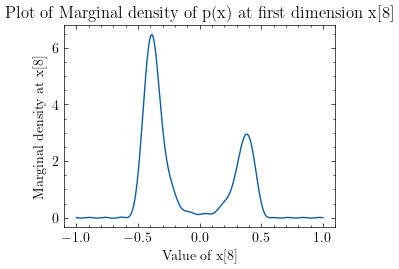

In [242]:
k = 8

x = np.zeros([200, d])
x[:, k] = np.linspace(-1, 1, x.shape[0])

plt.plot(x[:, k], htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if x != k]))
# plt.ylim([-100, np.max(tt_obtained.evaluate_marginal(x, mask = [1,2]))])
plt.xlabel(f'Value of x[{k}]')
plt.ylabel(f'Marginal density at x[{k}]')
plt.title(f'Plot of Marginal density of p(x) at first dimension x[{k}]')
plt.show()


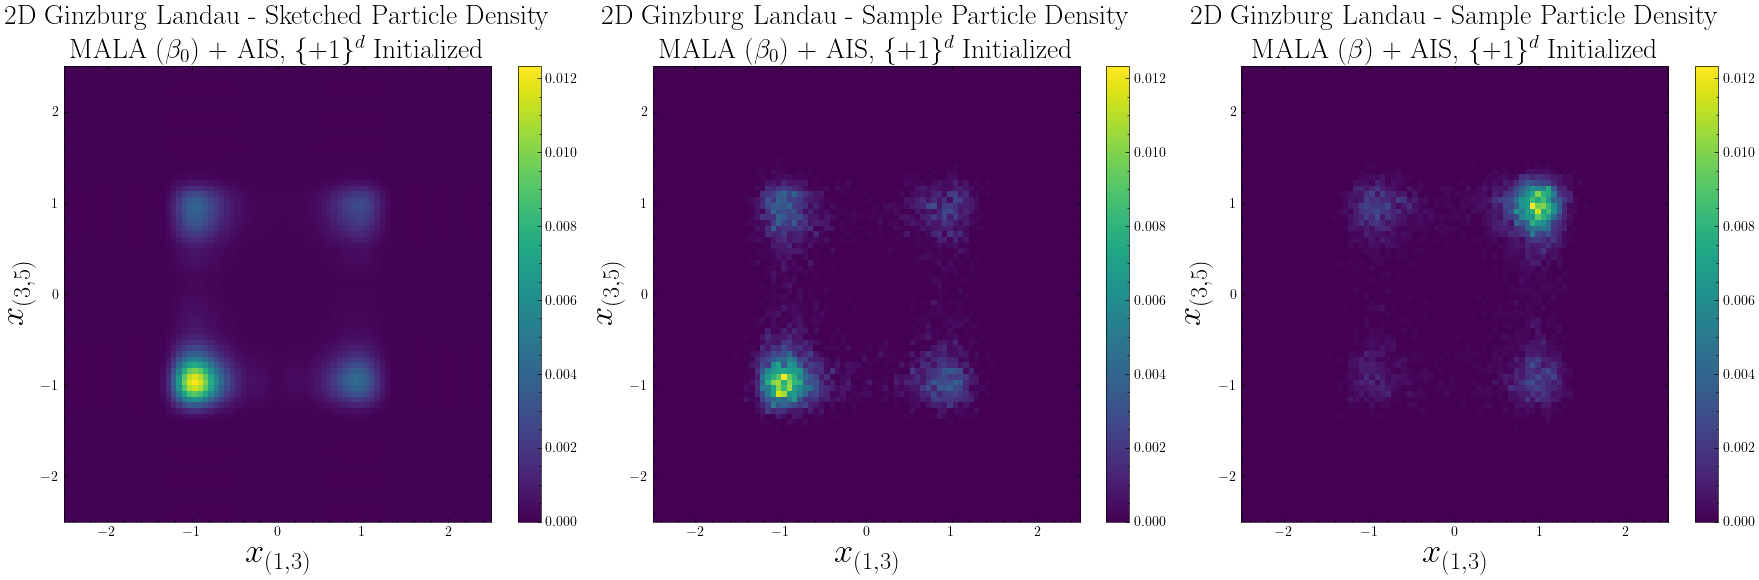

In [243]:
import numpy as np
import matplotlib.pyplot as plt

d = 256

# Parameters for columns
particle_1 = (1, 3)
# particle_2 = (6, 8)
particle_2 = (3, 5)
col1, col2 = interlace(particle_1[0], particle_1[1], 4), interlace(particle_2[0], particle_2[1], 4)

# Create a grid
n_grid = 80
xx, yy = np.linspace(-1, 1, n_grid), np.linspace(-1, 1, n_grid)
X, Y = np.meshgrid(xx, yy)

# Pre-allocate the heatmap matrix
heatmap = np.zeros((n_grid, n_grid))

x = np.zeros([n_grid*n_grid, d])
for i in range(n_grid):
    for j in range(n_grid):
        z_val = np.array([[X[i, j], Y[i, j]]])
        x[j*n_grid + i, [col1, col2]] = z_val
evaluated_marginal =  htn_obtained_2d.evaluate_marginal(x, mask=[x + 1 for x in range(d) if not x in [col1, col2]])
for i in range(n_grid):
    for j in range(n_grid):
        heatmap[j, i] = evaluated_marginal[j*n_grid + i]
heatmap /= heatmap.sum()

# Extract the particle positions
particles = y_2d[:, [col1, col2]]

# Create a 2D histogram for particles
hist, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist /= hist.sum()  # Normalize

# Extract the particle positions
particles = y_2d_2[:, [col1, col2]]

# Create a 2D histogram for particles
hist_2, xedges, yedges = np.histogram2d(particles[:, 0], particles[:, 1], bins=n_grid, range=[[-1, 1], [-1, 1]])
hist_2 /= hist_2.sum()  # Normalize


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

label_size = 25
title_size = 20

# Heatmap for htn_obtained.evaluate_marginal
im1 = axes[0].imshow(heatmap, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_title("2D Ginzburg Landau - Sketched Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[0].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[0].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[1].imshow(hist, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_title("2D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta_0$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[1].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[1].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

# Heatmap for particles
im2 = axes[2].imshow(hist_2, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', aspect='auto', cmap='viridis')
axes[2].set_title("2D Ginzburg Landau - Sample Particle Density\n" + r"MALA ($\beta$) + AIS, $\{+1\}^d$ Initialized", fontsize = title_size)
axes[2].set_xlabel(f"$x_{{{particle_1[0], particle_1[1]}}}$", fontsize = label_size)
axes[2].set_ylabel(f"$x_{{{particle_2[0], particle_2[1]}}}$", fontsize = label_size)

plt.tight_layout()

cbar = fig.colorbar(im2, ax=axes[0], orientation='vertical')

cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')

cbar3 = fig.colorbar(im2, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.savefig(f"{file}_AIS.pdf", format="pdf")
# plt.savefig("2D_GZ.pdf", format="pdf", dpi=300)

plt.show()